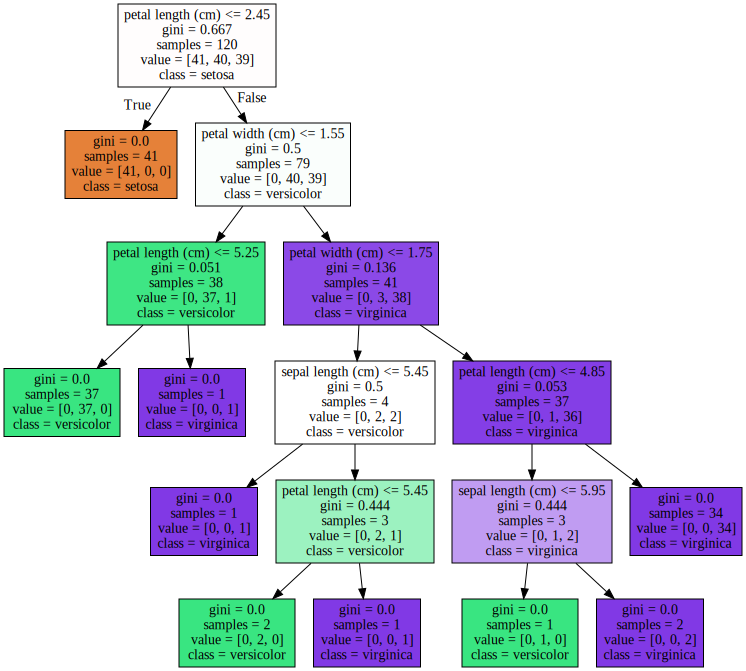

In [4]:
'''
I. 분류 개요
    1. 결정 트리
        - 정보의 균일도를 측정 : 엔트로피를 이용한 정보이득(1-엔트로피)과 지니계수(낮을 수록 정보이득 높음)
        - 사이킷런의 DecisionTreeClassifier는 지니계수 활용
        - 장점: 쉽다 / 단점 : 과적합 위험
        
        (1) 결정트리 파라미터
            - min_samples_split : 노드를 분할하기 위한 최소한의 샘플 데이터수로 과적합을 제어하는데 사용, 디폴트값은 2, 작게 설정할 수록 분할 되는 노드가 많아져서 과적합 가능성 증가
            - min_samples_leaf : 말단 노드가 되기 위한 최소한의 샘플 데이터 수, 과적합 제어용도, 비대칭적 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 이 경우는 작게 설정 필요
            - max_features : 최적의 분할을 위해 고려할 최대 피처 개수, 디폴트값은 None(데이터 세트의 모든 피처를 사용해 분할), int형으로 지정하면 대상 피처의 개수, float 형으로 지정하면 전체 피처 중 대상 피처의 퍼센트, sqrt는 sqrt(전체피처개수)만큼 설정(=auto로 지정하는 것과 동일), log는 log2(전체피처개수)선정
            - max_depth : 트리의 최대 깊이, 디폴트는 None(완벽하게 클래스의 결정갚이 될 때까지 깊이를 게속 키우거나 노드가 가지는 데이터 개수가 min_samples_split보다 작아질 때까지 계속 깊이 증가), 깊이가 깊어지면 과적합 위험
            - max_leaf_nodes : 말단 노드의 최대 개수
            
        (2) 시각화
            - Graphviz 이용
'''
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)

from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names , feature_names = iris_data.feature_names, impurity=True, filled=True)

import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importance : [0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.03
sepal width (cm) : 0.00
petal length (cm) : 0.55
petal width (cm) : 0.42


<AxesSubplot:>

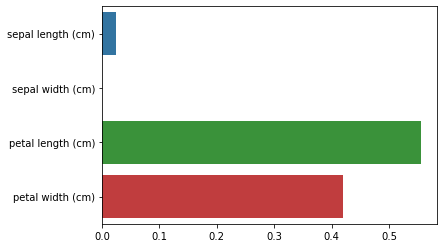

In [10]:
'''
            - 브랜치노드(자식노드가 있는 노드)에서 samples는 현규칙에 해당하는 데이터 수, value = []는 클래스별로 분류된 데이터 수, class = 는 하위노드를 가질 경우 제일 많은 값을 가진 클래스
            - 노드의 색깔이 짙어질 수록 지니계수가 낮음 & 각 색깔은 클래스를 의미
            - 클래스가 최종 1개로 분류될 때 까지 분류가 계속 됨 -> 과적합
            - 피처별 정확도를 feature_importrances_로 받아올 수 있음
            - min_samples_split(samples가 n개 이상은 되어야 split 가능) vs min_samples_leaf(samples가 n개 이하가 되면 leaf 노드(자식노드가 없는 노드)가 됨 -> samples 개수가 n개 이하가 되도록 트리가 더 간결하고 깔끔해짐)
'''
import seaborn as sns
import numpy as np
%matplotlib inline

#feature importance 추출
print("Feature importance :", np.round(dt_clf.feature_importances_,3))

#feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{} : {:.2f}'.format(name, value))
    
#시각화
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

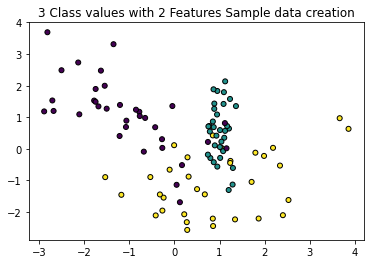

In [12]:
'''
        (3) 결정트리 과적합
            - 의사결정트리가 가지는 과적합 문제를 시각화
            - 사이킷런이 제공하는 분류 테스트용 데이터를 만드는 함수인 make_classification() 이용 
'''
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class values with 2 Features Sample data creation')

#2차원 시각화를 위해 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

#시각화
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c = y_labels, s=25, edgecolor='k')

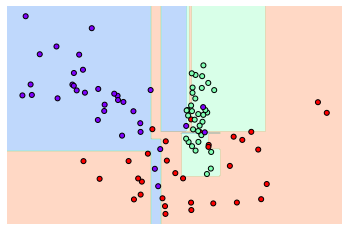

In [14]:
# 하이어 파라미터가 디폴트인 경우 분류기를 학습하고 경계를 시각화
from sklearn.tree import DecisionTreeClassifier

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)
    
#시각화
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels) # 경계가 매우 많아짐을 확인

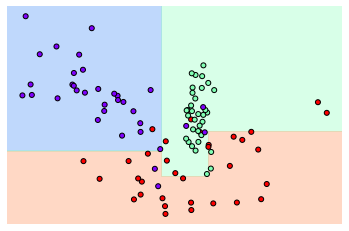

In [15]:
#min_samples_leaf=6으로 트리 생성조건을 제약
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels) # 경계가 매우 많아짐을 확인

In [18]:
'''
        (3) 결정트리 실습 - 사용자 행동 인식 데이터 세트
            - 30명에게 스마트폰 센서를 장착, 사람의 동작과 관련되어 수집된 여러가지 피처를 기반으로 사람의 동작 예측
            - http://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones
'''
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리 -> \s+
feature_name_df = pd.read_csv('features.txt',sep='\s+',header=None, names=['column_index','column_name'])

#피처명 인덱스를 제거하고, 피처명만 리스트로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
print(feature_name[:10]) # 인체의 움직임과 관련된 속성의 평균/표준편차가 X,Y,Z축값으로 나타나 있음

['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [22]:
#feature.info에는 중복된 피처명이 있음 ->현재 pandas에는 허용 X
#먼저 중복된 피처명이 얼마나 있는지 확인해보면
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count()) #총 42개의 중복 확인
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [26]:
#중복된 피처명에 대해서는 원본 피처명에 _1 또는 _2를 추가로 부여해 새로운 피처명을 만드는 함수 생성
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x : x[0] + '_' + str(x[1]) if x[1] > 0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [38]:
# 본 예제는 앞으로도 많이 사용되므로 데이터 프레임으로 생성하는 함수 생성
import pandas as pd

def get_human_dataset():
    
    feature_name_df = pd.read_csv('features.txt', sep='\s+', header=None, names = ['column_index','column_name'])
    
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    X_train = pd.read_csv('X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('X_test.txt', sep='\s+', names=feature_name)
    
    y_train = pd.read_csv('y_train.csv', names=['action'])
    y_test = pd.read_csv('y_test.csv', names=['action'])
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [39]:
#정보
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [41]:
y_train.value_counts()

action
6         1407
5         1374
4         1286
1         1226
2         1073
3          986
dtype: int64

In [44]:
# 먼저 의사결정 트리의 하이퍼파라미터를 디폴트로 한 뒤 하이퍼 파라미터 추출
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('Accuracy: ' ,accuracy)

#하이퍼 파라미터 추출
print('기본 파라미터', dt_clf.get_params())

Accuracy:  0.8547675602307431
기본 파라미터 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}


In [45]:
# GridSearchCV를 이용해 max_depth 값을 변화시키면서 예측 성능을 확인
from sklearn.model_selection import GridSearchCV

params = {'max_depth' : [6,8,10,12,16,20,24]}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5, verbose =1)
grid_cv.fit(X_train, y_train)


Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  2.6min finished


최고 평균 정확도 :0.8513


NameError: name 'gird_cv' is not defined

In [46]:
print('최고 평균 정확도 :{:.4f}'.format(grid_cv.best_score_))
print('최적 하이퍼 파라미터 :', grid_cv.best_params_)

최고 평균 정확도 :0.8513
최적 하이퍼 파라미터 : {'max_depth': 16}


In [49]:
# 파라미터에 따른 정확성 변화 확인
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth','mean_test_score']]


,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [51]:
#최적 max_depth로 테스트 수행
dt_clf = DecisionTreeClassifier(max_depth = 16)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

print(accuracy_score(y_test, pred))

0.8608754665761792


In [54]:
# max_depth와 min_samples_split을 같이 변경하면서 정확도 성능 튜닝
params = {'max_depth':[8,12,16,20], 'min_samples_split':[16,24]}

grid_cv = GridSearchCV(dt_clf, param_grid = params, cv = 5, scoring = 'accuracy')
grid_cv.fit(X_train, y_train)
print('최고 정확성 :', grid_cv.best_score_)
print('최적 하이퍼 파라미터', grid_cv.best_params_)

최고 정확성 : 0.8554226150011329
최적 하이퍼 파라미터 {'max_depth': 8, 'min_samples_split': 16}


최종 정확도 : 0.8720732948761453


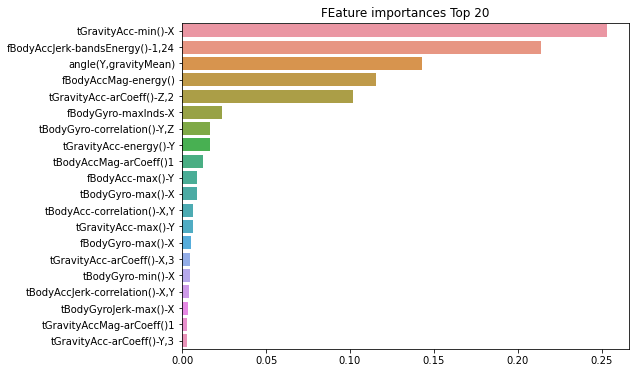

In [59]:
#최적 모델로 학습
best_dt_clf = grid_cv.best_estimator_
pred1 = best_dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('최종 정확도 :', accuracy)

#피처 중요도를 시각화
import seaborn as sns
ftr_importances_values = best_dt_clf.feature_importances_
#시리즈 변환
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
#중요도값 순으로 Series 정렬
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]
plt.figure(figsize=(8,6))
plt.title('FEature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()